In [204]:
from scipy import signal, ndimage
import numpy as np
from skimage import img_as_float, io
from scipy.ndimage import laplace
from skimage.exposure import adjust_gamma
import matplotlib.pylab as pylab



def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks



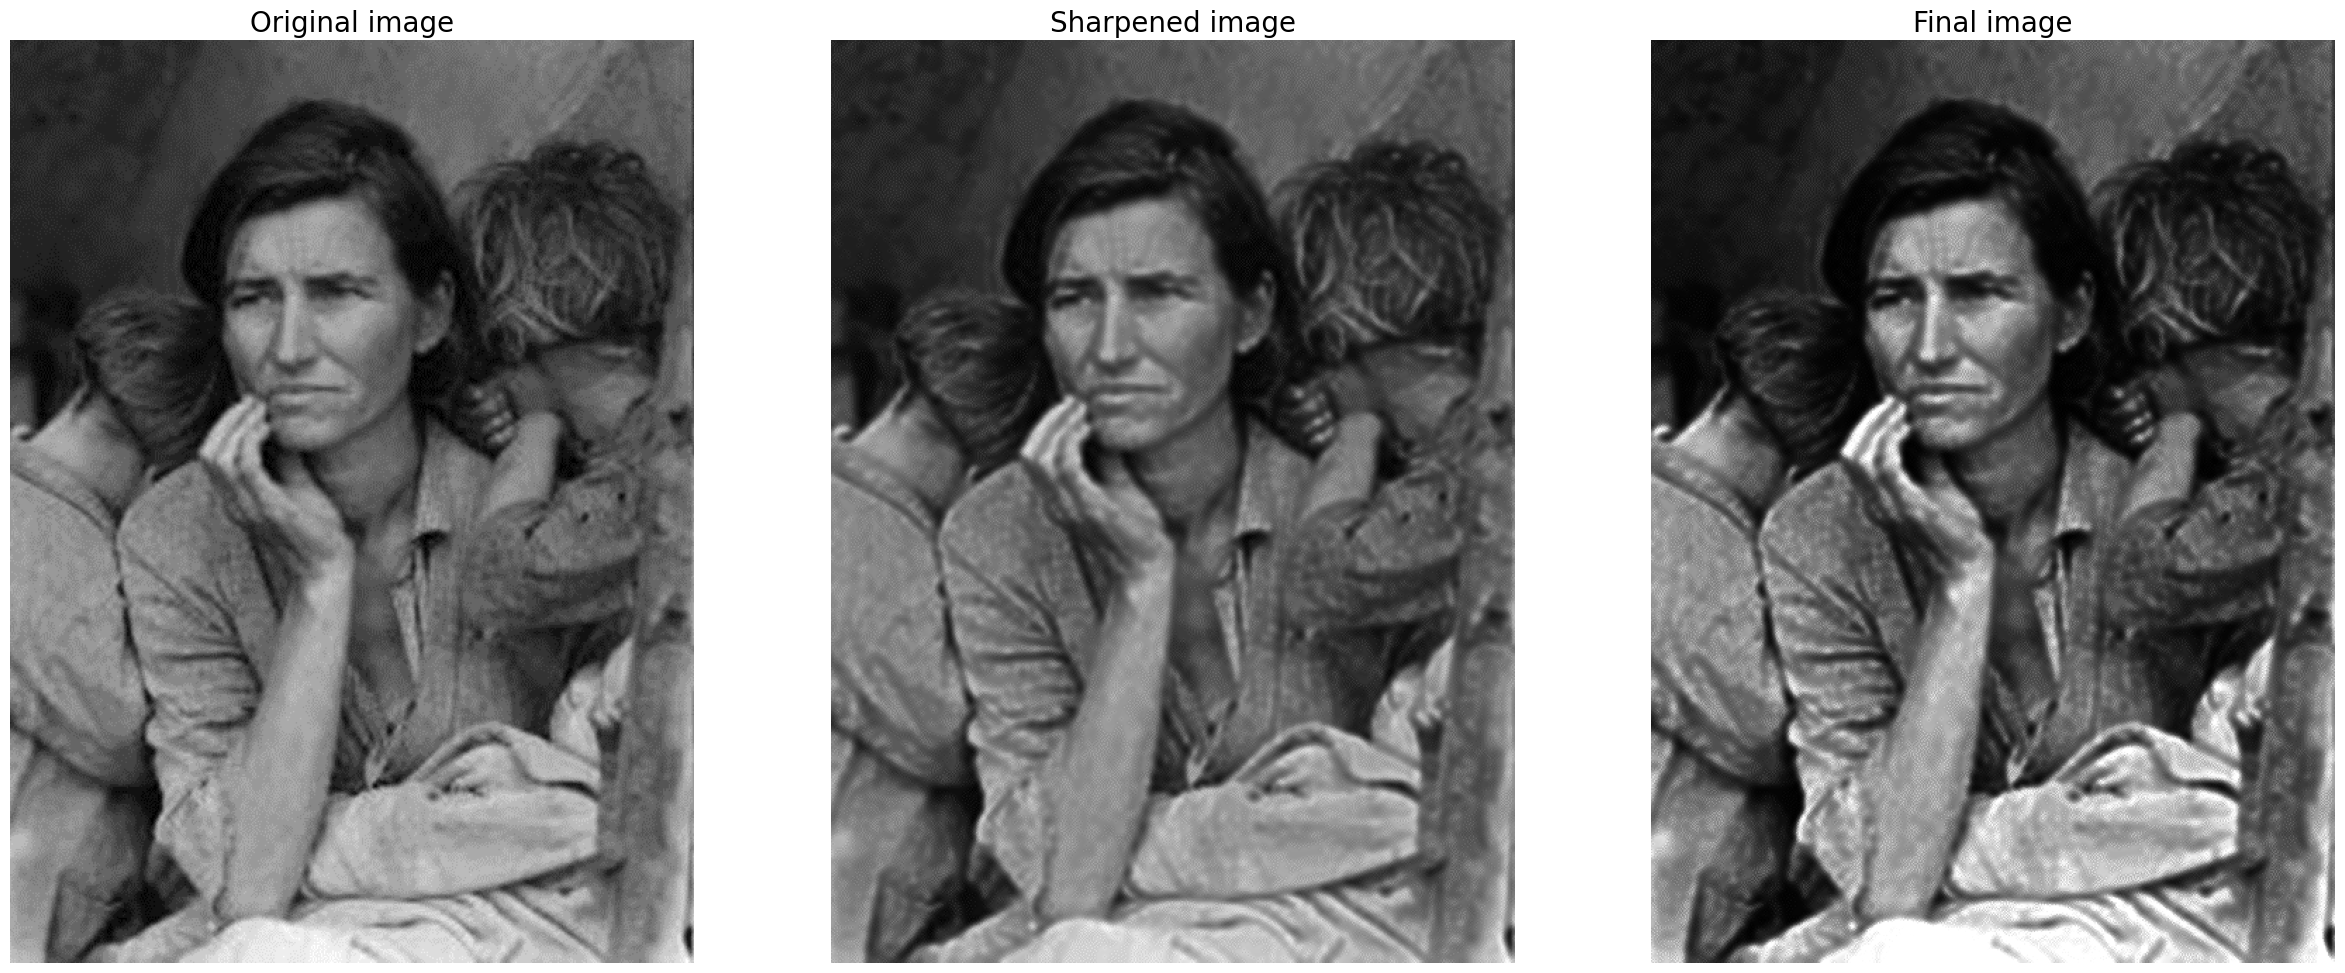

In [248]:
# Load the images
im = img_as_float(io.imread('images/Picture1.png', as_gray=True))

# Define the kernels
ker_x = [[-1, 1]]   # kernel for x-axis
ker_y = [[-1], [1]] # kernel for y-axis

im_smooth = ndimage.gaussian_filter(im, sigma=0.5)

# Compute the gradient in the x and y directions
im_x = signal.convolve2d(im_smooth, ker_x, mode='same')
im_y = signal.convolve2d(im_smooth, ker_y, mode='same')

# Compute the magnitude and direction of the gradient
im_mag = np.sqrt(im_x**2 + im_y**2)
im_dir = np.arctan2(im_y, im_x + 1e-10)

# Apply Laplacian to the original image
lapace = laplace(im_smooth)

im_sharpened = np.clip(im_smooth + 0.5*lapace, 0, 1)

# Apply Gaussian blur to the sharpened image
im_blurred = ndimage.gaussian_filter(im_sharpened, 5)

# Enhance the details
im_detail = np.clip(im_sharpened - im_blurred, 0, 1)

unsharp_mask = im_sharpened + im_detail

# Adjust contrast
im_contrast = adjust_gamma(unsharp_mask, 1.5)
# Adjust brightness
im_brightness = np.clip(im_contrast + 0.2, 0, 1)

# Display the images
pylab.figure(figsize=(30,30))
pylab.gray()
pylab.subplot(131), plot_image(im, 'Original image')
pylab.subplot(132), plot_image(unsharp_mask, 'Sharpened image')
pylab.subplot(133), plot_image(im_brightness, 'Final image')

pylab.show()